<a href="https://colab.research.google.com/github/compo90/App_Gestion_Budget/blob/master/MALARIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#to access kaggle datasets
!pip install kaggle
#Math operations
!pip install numpy
#Machine learning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#data preprocessing
import pandas as pd
#math operations
import numpy as np
#machine learning
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
import cv2
import keras
#from keras.utils import np_utils
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

from random import shuffle
from tqdm import tqdm
import scipy
import skimage
from skimage.transform import resize
import random

In [ ]:
# Colab's file access feature
from google.colab import files

#retrieve uploaded file
uploaded = files.upload()

#print results
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 70 bytes


In [ ]:
!kaggle datasets list

ref                                                          title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
valakhorasani/mobile-device-usage-and-user-behavior-dataset  Mobile Device Usage and User Behavior Dataset   11KB  2024-09-28 20:21:12          11198        211  1.0              
satvshr/top-4-used-car-sales-datasets-combined               Top 4 Used Car Sales Datasets Combined         446KB  2024-10-21 13:20:56           1366         28  0.9411765        
bhadramohit/credit-card-fraud-detection                      Credit Card Fraud Detection                      2MB  2024-10-21 09:26:17            741         21  1.0              
valakhorasani/gym-members-exercise-dataset                   Gym Members Exercise Dataset           

In [ ]:
#download earthquake data, will take 30-60 seconds
#!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria/downloads/cell-images-for-detecting-malaria.zip/1
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

Dataset URL: https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria
License(s): unknown
100% 674M/675M [00:23<00:00, 33.5MB/s]
100% 675M/675M [00:23<00:00, 29.8MB/s]


In [ ]:
#unzip training data for usage, will take about 5 minutes (its big)
!ls
!unzip cell-images-for-detecting-malaria.zip
!ls

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_87

In [ ]:
PARA_DIR = "cell_images/Parasitized/"
UNIF_DIR =  "cell_images/Uninfected/"

In [ ]:
Pimages = os.listdir(PARA_DIR)
Nimages = os.listdir(UNIF_DIR)

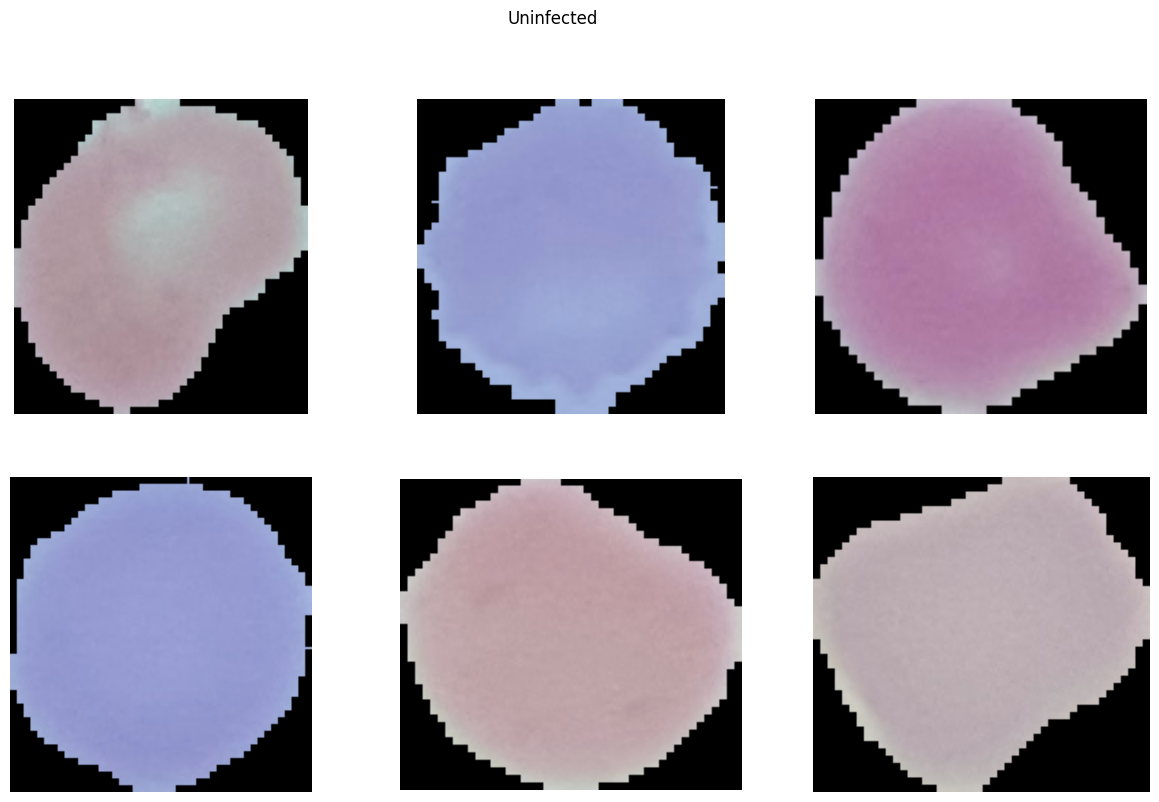

In [ ]:
sample_normal = random.sample(Nimages,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread('cell_images/Uninfected/'+sample_normal[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('Uninfected')
plt.show()

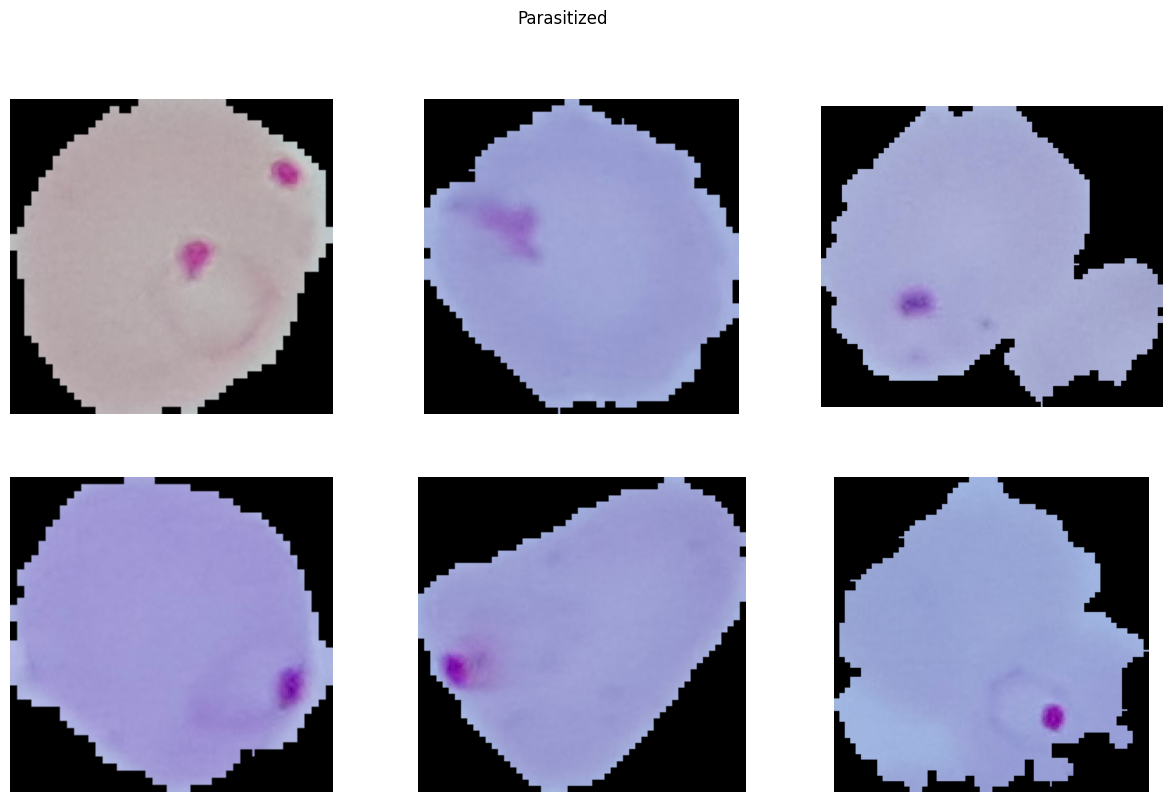

In [ ]:
sample_parasite = random.sample(Pimages,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread('cell_images/Parasitized/'+sample_parasite[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('Parasitized')
plt.show()

In [ ]:
data=[]
labels=[]
Parasitized=os.listdir("cell_images/Parasitized/")
for a in Parasitized:
    try:
        image=cv2.imread("cell_images/Parasitized/"+a)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((50, 50))
        data.append(np.array(size_image))
        labels.append(0)
    except AttributeError:
        print("")

Uninfected=os.listdir("cell_images/Uninfected/")
for b in Uninfected:
    try:
        image=cv2.imread("cell_images/Uninfected/"+b)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((50, 50))
        data.append(np.array(size_image))
        labels.append(1)
    except AttributeError:
        print("")

In [ ]:
Cells=np.array(data)
labels=np.array(labels)

In [ ]:
np.save("Cells",Cells)
np.save("labels",labels)

In [ ]:
Cells=np.load("Cells.npy")
labels=np.load("labels.npy")

In [ ]:
s=np.arange(Cells.shape[0])
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

In [ ]:
num_classes=len(np.unique(labels))
len_data=len(Cells)

In [ ]:
(x_train,x_test)=Cells[(int)(0.1*len_data):],Cells[:(int)(0.1*len_data)]
x_train = x_train.astype('float32')/255 # As we are working on image data we are normalizing data by divinding 255.
x_test = x_test.astype('float32')/255
train_len=len(x_train)
test_len=len(x_test)

In [ ]:
(y_train,y_test)=labels[(int)(0.1*len_data):],labels[:(int)(0.1*len_data)]

In [ ]:
#Doing One hot encoding as classifier has multiple classes
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Set random seed
np.random.seed(0)

In [ ]:
#creating sequential model
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(2,activation="softmax"))#2 represent output layer neurons
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 50, 50, 32)          │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 25, 25, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 25, 25, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 25, 25, 32)          │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 32)          │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 600,034 (2.29 MB)

 Trainable params: 600,034 (2.29 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compile the model with loss as categorical_crossentropy and using adam optimizer you can test result by trying RMSProp as well as Momentum
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             #ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]
from keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor='val_loss', patience=2),
    ModelCheckpoint('mdl_wts.keras', monitor='val_loss', save_best_only=True)  # Change to .keras
]


In [ ]:
#Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ]
h=model.fit(x_train,y_train,batch_size=32,callbacks=callbacks, validation_data=(x_test,y_test),epochs=20,verbose=1)

Epoch 1/20
776/776 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6625 - loss: 0.5740 - val_accuracy: 0.9517 - val_loss: 0.1649
Epoch 2/20
776/776 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9454 - loss: 0.1739 - val_accuracy: 0.9568 - val_loss: 0.1449
Epoch 3/20
776/776 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9510 - loss: 0.1580 - val_accuracy: 0.9583 - val_loss: 0.1415
Epoch 4/20
776/776 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9561 - loss: 0.1436 - val_accuracy: 0.9550 - val_loss: 0.1396
Epoch 5/20
776/776 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9562 - loss: 0.1413 - val_accuracy: 0.9550 - val_loss: 0.1443
Epoch 6/20
776/776 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9565 - loss: 0.1376 - val_accuracy: 0.9550 - val_loss: 0.1323
Epoch 7/20
776/776 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9561 - loss: 0.1356 - val_accuracy: 0.9550 - val_loss: 0.1325
Epoch 8/20
776/776 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9580 - loss: 0.1306 - val_accuracy: 

In [ ]:
#from numpy import loadtxt
#from keras.models import load_model
#model = load_model('.mdl_wts.hdf5')
from numpy import loadtxt
from keras.models import load_model
# The model was saved as 'mdl_wts.keras', not '.mdl_wts.hdf5'
model = load_model('mdl_wts.keras') #Corrected file name

In [ ]:
score=model.evaluate(x_test,y_test)
print(score)

87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9595 - loss: 0.1248
[0.12636257708072662, 0.9582577347755432]


In [ ]:
accuracy = model.evaluate(x_test, y_test, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])

87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9595 - loss: 0.1248

 Test_Accuracy:- 0.9582577347755432


In [ ]:
from sklearn.metrics import confusion_matrix
pred = model.predict(x_test)
pred = np.argmax(pred,axis = 1)
y_true = np.argmax(y_test,axis = 1)

87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


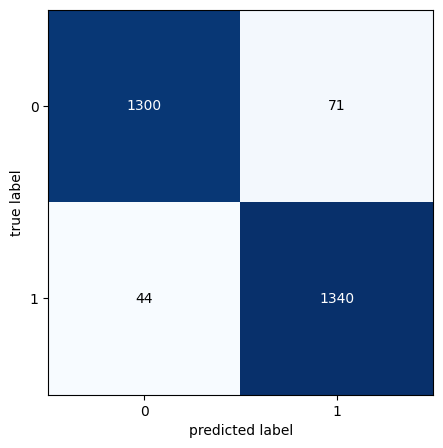

In [ ]:
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [ ]:
i=9
pred = model.predict(x_test,batch_size=1)
pred = np.argmax(pred,axis = 1)

2755/2755 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


In [ ]:
pred[0]

0

In [ ]:
!mkdir models_app

In [ ]:
model.save('models_app/my_model.keras')  # Use the new Keras format


In [ ]:
#!zip -r models_app.zip my_model.h5
!zip -r models_app.zip models_app/my_model.keras


  adding: models_app/my_model.keras (deflated 8%)


In [ ]:
from google.colab import files
files.download('models_app.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
len(model.layers)

13

In [ ]:
x_test.shape[0]

2755

In [ ]:
import keras
print(keras.__version__)

3.4.1


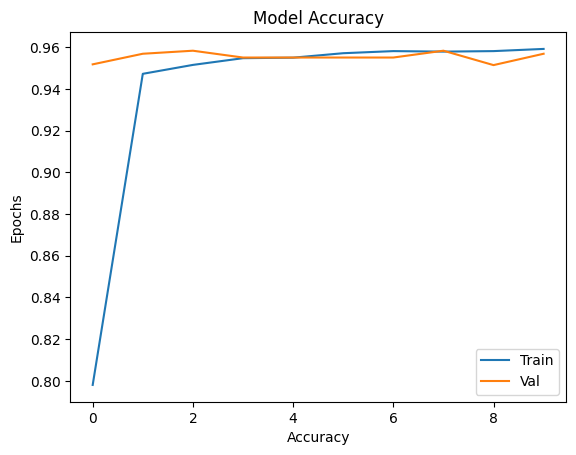

In [ ]:
plt.plot(h.history['accuracy'])
plt.plot(h.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Epochs")
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
#fpr_keras, tpr_keras, thresholds = roc_curve(y_true.ravel(), pred.ravel())
##auc_keras = auc(fpr_keras, tpr_keras)
#auc_keras
from sklearn.metrics import roc_curve, auc # Import the auc function

fpr_keras, tpr_keras, thresholds = roc_curve(y_true.ravel(), pred.ravel())
auc_keras = auc(fpr_keras, tpr_keras) # Now auc is defined and can be used
auc_keras

0.9582105378547366

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

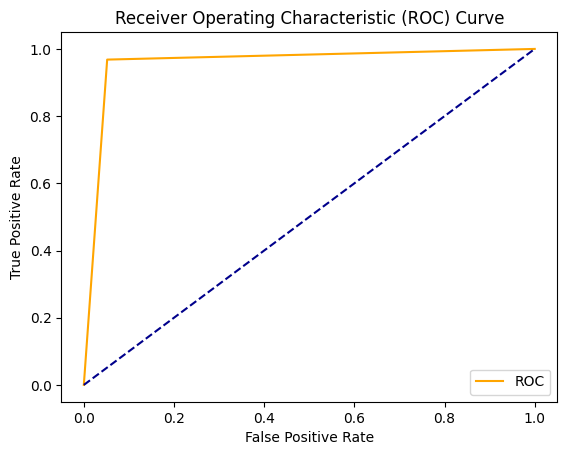

In [ ]:
plot_roc_curve(fpr_keras, tpr_keras)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:


print('{}'.format(
                           classification_report(y_true , pred)))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1371
           1       0.95      0.97      0.96      1384

    accuracy                           0.96      2755
   macro avg       0.96      0.96      0.96      2755
weighted avg       0.96      0.96      0.96      2755



In [ ]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
malaria_labels = ['Parasitized','Uninfected']

87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
x_test.shape[0]

2755

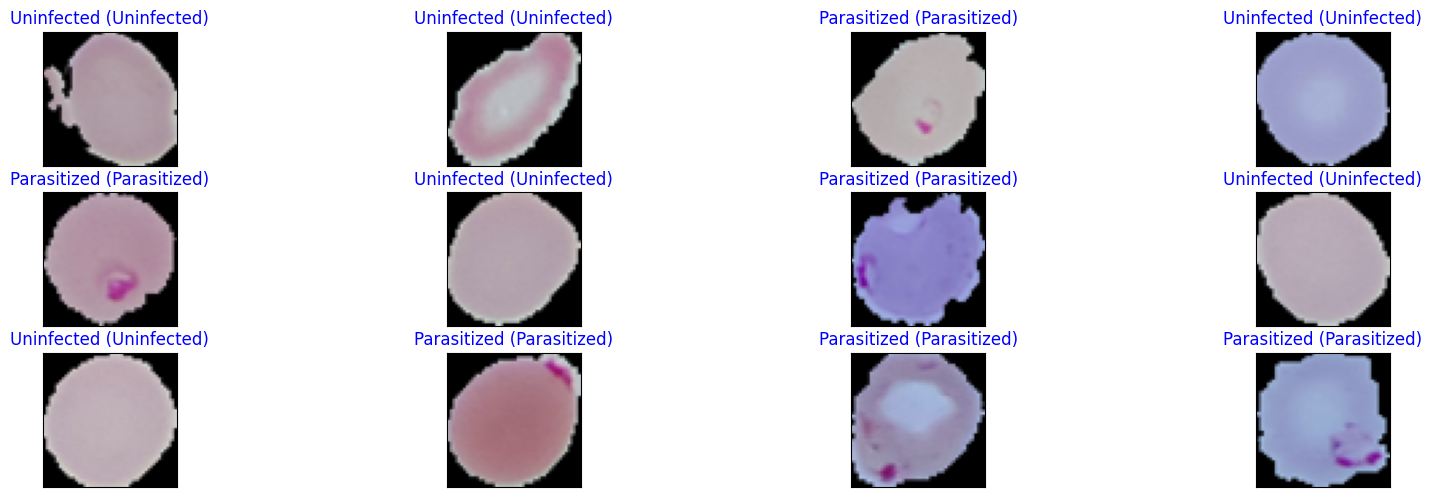

In [ ]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=12, replace=False)):
    ax = fig.add_subplot(4,4, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(malaria_labels[pred_idx], malaria_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "orange"))

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 93.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 103.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 7.6 MB/s eta 0:00:00


In [10]:
!wget -q -O - ipv4.icanhazip.com

34.90.224.212


In [ ]:
! streamlit run streamlit.app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.90.224.212:8501

your url is: https://shiny-feet-fail.loca.lt
2024-10-24 14:28:49.995640: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-24 14:28:50.020245: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-24 14:28:50.027933: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-24 14:28:50.045815: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instru